In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import pyinputplus as pyip
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import metrics
from ipywidgets import Layout

<h1>Reading the data and getting familiar with it</h1>

In [2]:
# Read csv into a dataframe
df = pd.read_csv("mushrooms.csv")
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Check for NULL values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<h5>We have no null values in our data, which is good.</h5>

In [4]:
# View the different categories
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<h5>There are two classifications of mushrooms we are focusing on. Poisonous and Edible</h5>

In [5]:
df['class'] = df['class'].replace(['e', 'p'], ['edible', 'poisonous'])

edible       4208
poisonous    3916
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

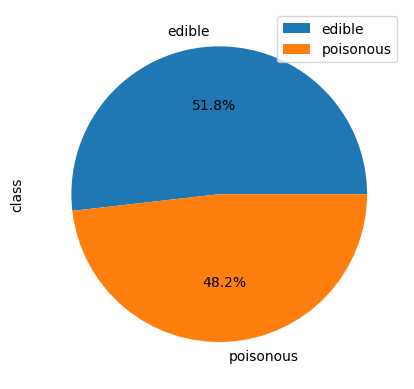

In [6]:
# Get counts of poisonous and edible fungi and display as pie chart
print(df["class"].value_counts())
df["class"].value_counts().plot(kind = "pie", legend = True, autopct='%1.1f%%')

<h5>Our data is loosely balanced between poisonous and edible</h5>

In [7]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

<h4>Our data is currently all objects. Lets convert objects to integers for visualization/training purposes</h4>

In [8]:
# I am converting the objects to int32 as that we can train our model
# This also allows for more data visualization tactics

# Converting class to int32
df['class'] = df['class'].replace(['edible', 'poisonous'],
                                  ['0',       '1'])
# Converting cap-shape to int32
df['cap-shape'] = df['cap-shape'].replace(['b', 'c', 'x', 'f', 'k', 's'], 
                                          ['0', '1', '2', '3', '4', '5'])
# Converting cap-surface to int32
df['cap-surface'] = df['cap-surface'].replace(['f', 'g', 'y', 's'], 
                                              ['0', '1', '2', '3'])
# Converting cap-color to int32
df['cap-color'] = df['cap-color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], 
                                          ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
# Converting bruises to int32
df['bruises'] = df['bruises'].replace(['t', 'f'], 
                                      ['0', '1'])
# Converting odor to int32
df['odor'] = df['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                                ['0', '1', '2', '3', '4', '5', '6', '7', '8'])
# Converting gill-attachment to int32
df['gill-attachment'] = df['gill-attachment'].replace(['a', 'd', 'f', 'n'],
                                                      ['0', '1', '2', '3'])
# Converting gill-spacing to int32
df['gill-spacing'] = df['gill-spacing'].replace(['c', 'w', 'd'],
                                                ['0', '1', '2'])
# Converting gill-size to int32
df['gill-size'] = df['gill-size'].replace(['b', 'n'],
                                          ['0', '1'])
# Converting gill-color to int32
df['gill-color'] = df['gill-color'].replace(['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w',  'y'],
                                            ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
# Converting stalk-shape to int32
df['stalk-shape'] = df['stalk-shape'].replace(['e', 't'],
                                              ['0', '1'])
# Converting stalk-root to int32
df['stalk-root'] = df['stalk-root'].replace(['b', 'c', 'u', 'e', 'z', 'r', '?'],
                                            ['0', '1', '2', '3', '4', '5', '6'])
# Converting stalk-surface-above-ring to int32
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace(['f', 'y', 'k', 's'],
                                                                        ['0', '1', '2', '3'])
# Converting stalk-surface-below-ring to int32
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace(['f', 'y', 'k', 's'],
                                                                        ['0', '1', '2', '3'])
# Converting stalk-color-above-ring to int32
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace(['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                                                                    ['0', '1', '2', '3', '4', '5', '6', '7', '8'])
# Converting stalk-color-below-ring to int32
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace(['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                                                                    ['0', '1', '2', '3', '4', '5', '6', '7', '8'])
# Converting veil-type to int32
df['veil-type'] = df['veil-type'].replace(['p', 'u'],
                                          ['0', '1'])
# Converting veil-color to int32
df['veil-color'] = df['veil-color'].replace(['n', 'o', 'w', 'y'],
                                            ['0', '1', '2', '3'])
# Converting ring-number to int32
df['ring-number'] = df['ring-number'].replace(['n', 'o', 't'],
                                              ['0', '1', '2'])
# Converting ring-type to int32
df['ring-type'] = df['ring-type'].replace(['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                                          ['0', '1', '2', '3', '4', '5', '6', '7'])
# Converting spore-print-color to int32
df['spore-print-color'] = df['spore-print-color'].replace(['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                                                          ['0', '1', '2', '3', '4', '5', '6', '7', '8'])
# Converting population to int32
df['population'] = df['population'].replace(['a', 'c', 'n', 's', 'v', 'y'],
                                            ['0', '1', '2', '3', '4', '5'])
# Converting habitat to int32
df['habitat'] = df['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'],
                                      ['0', '1', '2', '3', '4', '5', '6'])

In [9]:
# Recast the dataframe as int32
df = df.astype('int')
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

<h3>Now we can create a heatmap to visualize which attributes correlate the most with the class</h3>

<AxesSubplot:>

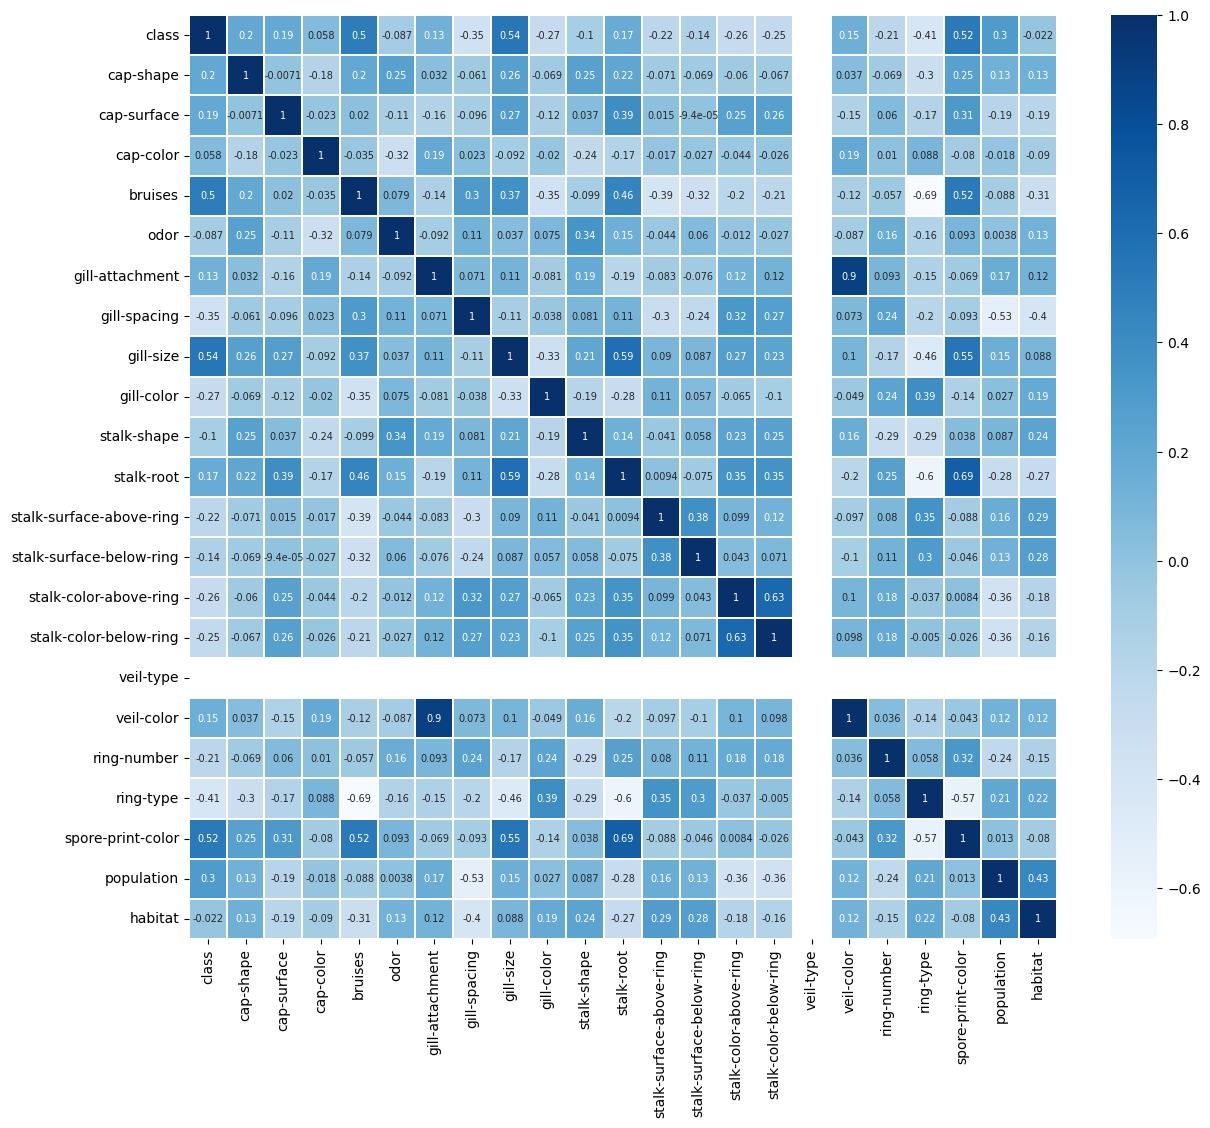

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths = .1, annot = True, annot_kws = {"size": 7}, cmap = "Blues")


<h4>The veil-type category is always the same so we can remove it from the data</h4>

In [11]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [12]:
df = df.drop(['veil-type'], axis = 1)

<AxesSubplot:>

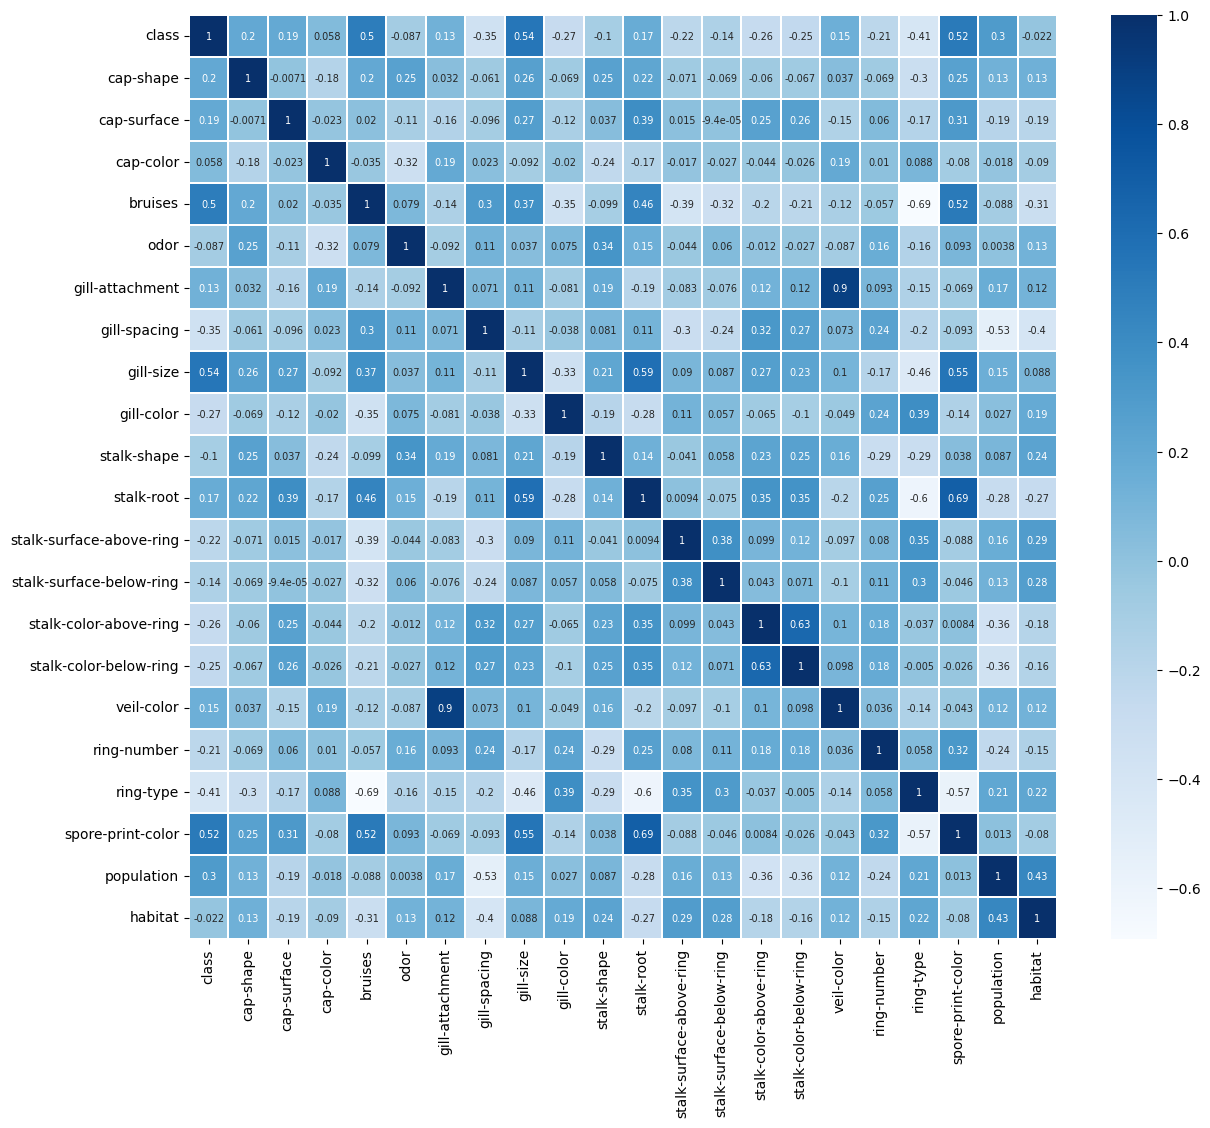

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths = .1, annot = True, annot_kws = {"size": 7}, cmap = "Blues")

<h2>Building our model using a Support Vector Machine algorithm</h2>

In [14]:
X = df.drop(['class'], axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
pd.set_option('display.max_columns', None)

In [15]:
model = SVC(random_state=42, gamma="auto", kernel='linear')
model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', random_state=42)

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Test Accuracy: {} %".format(round(model.score(X_test, y_test)*100, 2)))
print("Precision:",metrics.precision_score(y_test, y_pred)*100,'%')
print("Recall:",metrics.recall_score(y_test, y_pred)*100,'%')

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1040
           1       0.95      0.99      0.97       991

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031

Test Accuracy: 97.0 %
Precision: 95.23346303501945 %
Recall: 98.7891019172553 %


<h5>We were able to obtain a 97% prediction accuracy using this method</h5>

<h3>Confusion Matrix for the predicted class vs actual class</h3>

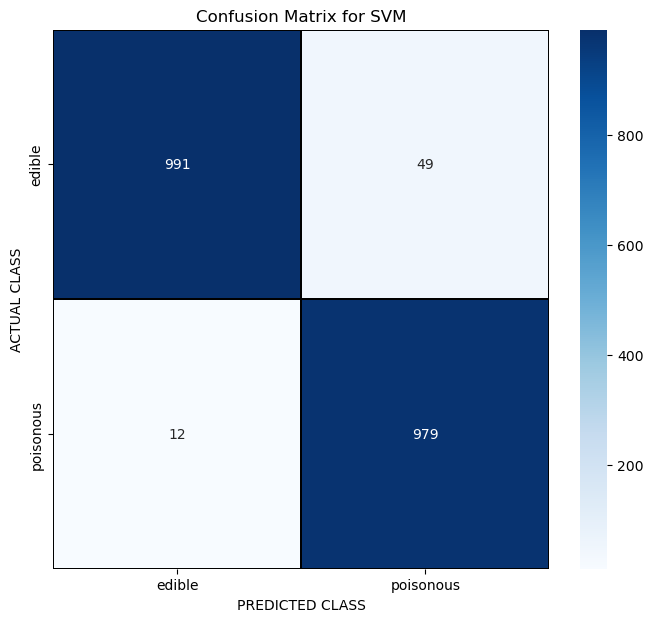

In [17]:
c_matrix = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize = (8, 7))
sns.heatmap(c_matrix, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels = ["edible", "poisonous"], yticklabels = ["edible", "poisonous"])
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for SVM')
plt.show()

<h2>Performing Principal Component Analysis to visual the data variances</h2>

In [18]:
pca = PCA()
pca.fit_transform(X)

array([[ 2.06754516, -2.39884688, -4.15553848, ...,  0.24938939,
         0.0611733 , -0.01603118],
       [-0.0201446 ,  8.0698882 , -1.26191796, ..., -0.03218009,
         0.05515084, -0.02264509],
       [-0.73527627,  6.23428932, -1.07012306, ..., -0.05166919,
         0.09265769, -0.04290225],
       ...,
       [ 3.97695877, -2.28110254, -3.13847885, ..., -0.01230517,
        -0.02276847,  0.40599411],
       [ 7.68942237, -2.00297416, -0.07646957, ..., -0.06208744,
        -0.07894566,  0.02696992],
       [ 0.72541032, -6.03896395,  5.10807164, ..., -0.11745404,
         0.08930506,  0.32233122]])

In [19]:
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
explained_variance

array([1.83442827e+01, 1.29615919e+01, 9.00028810e+00, 8.78955109e+00,
       5.66540926e+00, 3.47439013e+00, 1.82572619e+00, 1.71584172e+00,
       1.36619002e+00, 1.08149168e+00, 9.45135137e-01, 6.06222356e-01,
       5.93407677e-01, 3.86890430e-01, 1.54360250e-01, 1.21281970e-01,
       9.00518932e-02, 8.69499652e-02, 2.69508514e-02, 1.38518809e-02,
       6.15071624e-03])

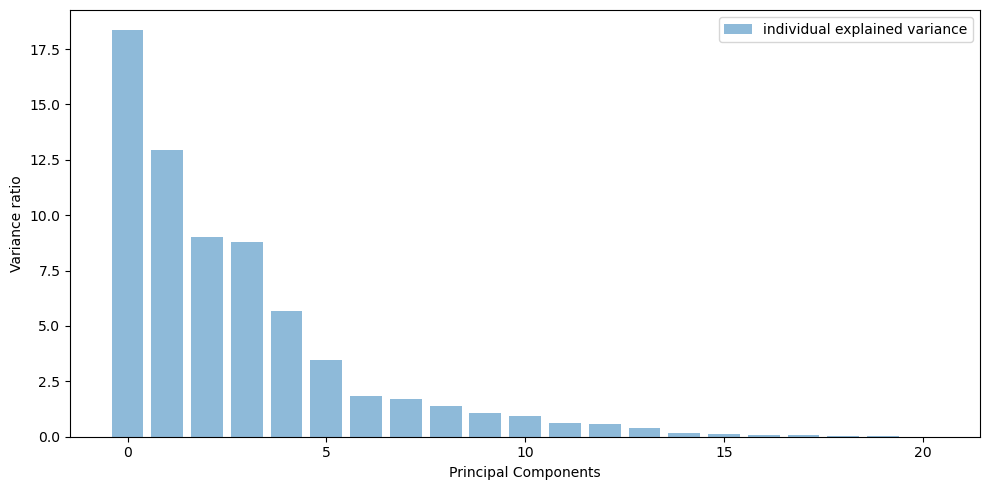

In [20]:
# Plotting the variance of each component
plt.figure(figsize=(10, 5))    
plt.bar(range(21), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()

<h5>The first four components to the left have the most amount of variance and accounts for about 70% of the weight<br>
The next eight contain an additional 20% of our variance and weight.<br>
The last five contains the remaining 10%</h5>

<h2>Using Principal Component Analysis to cluster classes using K-means</h2>

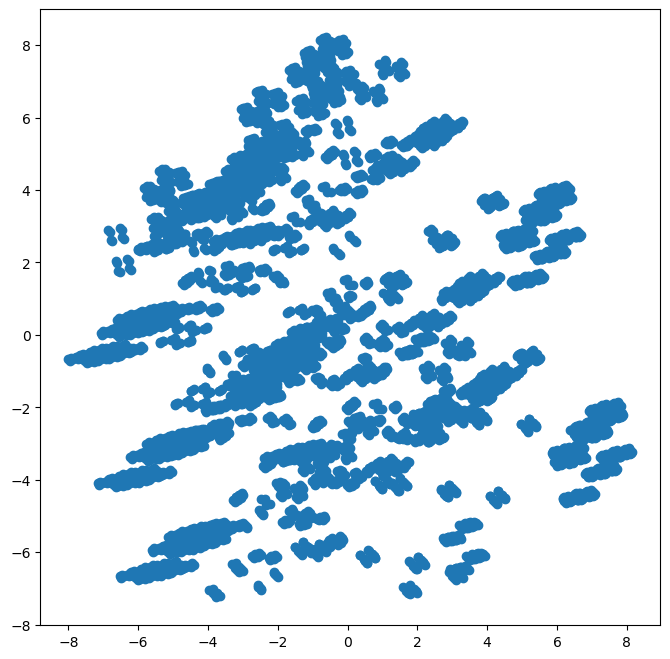

In [21]:
pca = PCA(n_components = 2)
x = pca.fit_transform(df.values)
plt.figure(figsize = (8, 8))
plt.scatter(x[:,0], x[:,1], cmap = "Blues")
plt.show()

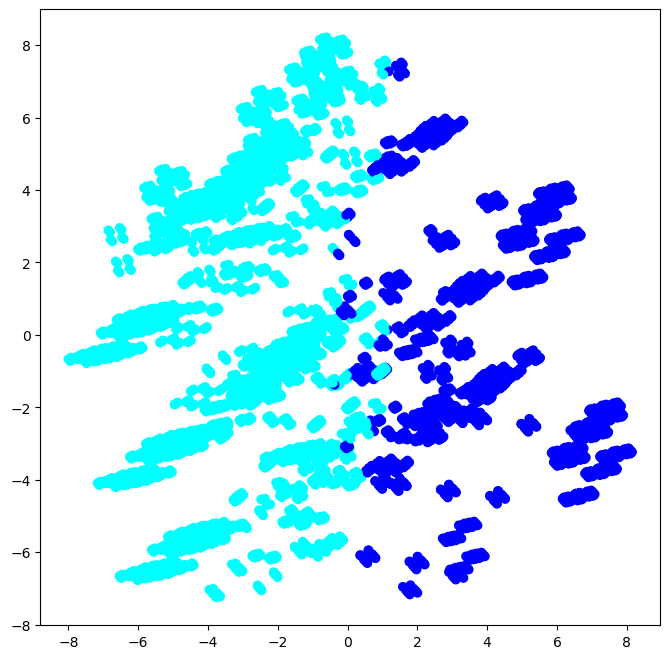

In [22]:
kmeans = KMeans(n_clusters=2, random_state=42)
X_cluster = kmeans.fit_predict(df.values)

colors = {0 : 'blue', 1 : 'cyan'}

label_color = [colors[i] for i in X_cluster]
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1], c = label_color, cmap = "Blues")
plt.show()

<h5>Using k-means clustering we were able to visually seperate the poisonous and edible mushrooms<br>
There is a slight overlap that explains our model's 3% inaccuracy</h5>

<h1>Use the dropdowns below to enter the characteristics of your mushroom.<br>
    Then click on the <i>Predict</i> button to see if the mushroom is <u>poisonous</u> or <u>edible</u> according to our model</h1>

In [23]:
cap_shape = widgets.Dropdown(
    description = "cap-shape",   
    options = [('bell', '0'), ('conical', '1'), ('convex', '2'), ('flat', '3'), ('knobbed', '4'), ('sunken', '5')]
)

cap_surface = widgets.Dropdown(
    description = "cap-surface",    
    options = [('fibrous', '0'), ('grooves', '1'), ('scaly', '2'), ('smooth', '3')]
)

cap_color = widgets.Dropdown(
    description = "cap-color",    
    options = [('brown', '0'), ('buff', '1'), ('cinnamon', '2'), ('gray', '3'), ('green', '4'), ('pink', '5'), 
               ('purple', '6'), ('red', '7'), ('white', '8'), ('yellow', '9')]
)

bruises = widgets.Dropdown(
    description = "bruises",    
    options = [('bruises', '0'), ('no', '1')]
)

odor = widgets.Dropdown(
    description = "odor",    
    options = [('almond', '0'), ('anise', '1'), ('creosote', '2'), ('fishy', '3'), ('foul', '4'), ('musty', '5'), 
               ('none', '6'), ('pungent', '7'), ('spicy', '8')]
)

gill_attachment = widgets.Dropdown(
    description = "gill-attachment",    
    options = [('attached', '0'), ('descending', '1'), ('free', '2'), ('notched', '3')]
)

gill_spacing = widgets.Dropdown(
    description = "gill-spacing",    
    options = [('close', '0'), ('crowded', '1'), ('distant', '2')]
)

gill_size = widgets.Dropdown(
    description = "gill-size",    
    options = [('broad', '0'), ('narrow', '1')]
)

gill_color = widgets.Dropdown(
    description = "gill-color",    
    options = [('black', '0'), ('brown', '1'), ('buff', '2'), ('chocolate', '3'), ('gray', '4'), ('green', '5'), 
               ('orange', '6'), ('pink', '7'), ('purple', '8'), ('red', '9'), ('white', '10'), ('yellow', '11')]
)

stalk_shape = widgets.Dropdown(
    description = "stalk-shape",    
    options = [('enlarging', '0'), ('tapering', '1')]
)

stalk_root = widgets.Dropdown(
    description = "stalk-root",    
    options = [('bulbous', '0'), ('club', '1'), ('cup', '2'), ('equal', '3'), ('rhizomorphs', '4'), 
               ('rooted', '5'), ('missing', '6')]
)

stalk_surface_above_ring = widgets.Dropdown(
    description = "stalk-surface-above-ring",    
    options = [('fibrous', '0'), ('scaly', '1'), ('silky', '2'), ('smooth', '3')]
)

stalk_surface_below_ring = widgets.Dropdown(
    description = "stalk-surface-below-ring",    
    options = [('fibrous', '0'), ('scaly', '1'), ('silky', '2'), ('smooth', '3')]
)

stalk_color_above_ring = widgets.Dropdown(
    description = "stalk-color-above-ring",    
    options = [('brown', '0'), ('buff', '1'), ('cinnamon', '2'), ('gray', '3'), ('orange', '4'), ('pink', '5'), 
               ('red', '6'), ('white', '7'), ('yellow', '8')]
)

stalk_color_below_ring = widgets.Dropdown(
    description = "stalk-color-below-ring",    
    options = [('brown', '0'), ('buff', '1'), ('cinnamon', '2'), ('gray', '3'), ('orange', '4'), ('pink', '5'), 
               ('red', '6'), ('white', '7'), ('yellow', '8')]
)

veil_color = widgets.Dropdown(
    description = "veil_color",    
    options = [('brown', '0'), ('orange', '1'), ('white', '2'), ('yellow', '3')]
)

ring_number = widgets.Dropdown(
    description = "ring-number",    
    options = [('none', '0'), ('one', '1'), ('two', '2')]
)

ring_type = widgets.Dropdown(
    description = "ring-type",    
    options = [('cobwebby', '0'), ('evanescent', '`'), ('flaring', '1'), ('large', '2'), ('none', '3'), 
               ('pendant', '4'), ('sheathing', '5'), ('zone', '6')]
)

spore_print_color = widgets.Dropdown(
    description = "spore-print-color",    
    options = [('black', '0'), ('brown', '1'), ('buff', '2'), ('chocolate', '3'), ('green', '4'), ('orange', '5'), 
               ('purple', '6'), ('white', '7'), ('yellow', '8')]
)

population = widgets.Dropdown(
    description = "population",    
    options = [('abundant', '0'), ('clustered', '1'), ('numerous', '2'), ('scattered', '3'), ('several', '4'), 
               ('solitary', '5')]
)

habitat = widgets.Dropdown(
    description = "habitat",    
    options = [('grasses', '0'), ('leaves', '1'), ('meadows', '2'), ('paths', '3'), ('urban', '4'), 
               ('waste', '5'), ('woods', '6')]
)

widget_box = widgets.VBox([cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, gill_spacing, gill_size,
                           gill_color, stalk_shape, stalk_root, stalk_surface_above_ring, stalk_surface_below_ring,
                           stalk_color_above_ring, stalk_color_below_ring, veil_color, ring_number, ring_type, 
                           spore_print_color, population, habitat])

box_tuple = [widget_box]
tab = widgets.Tab()
tab.children = box_tuple

tab

In [24]:
def on_button_clicked(_):    
    mushroom = [{'cap-shape': cap_shape.value, 
                  'cap-surface': cap_surface.value, 
                  'cap-color': cap_color.value, 
                  'bruises': bruises.value, 
                  'odor': odor.value,
                  'gill-attachment': gill_attachment.value, 
                  'gill-spacing': gill_spacing.value, 
                  'gill-size': gill_size.value, 
                  'gill-color': gill_color.value, 
                  'stalk-shape': stalk_shape.value, 
                  'stalk-root': stalk_root.value, 
                  'stalk-surface-above-ring': stalk_surface_above_ring.value, 
                  'stalk-surface-below-ring': stalk_surface_below_ring.value,
                  'stalk-color-above-ring': stalk_color_above_ring.value, 
                  'stalk-color-below-ring': stalk_color_below_ring.value, 
                  'veil-color': veil_color.value,
                  'ring-number': ring_number.value,
                  'ring-type': ring_type.value, 
                  'spore-print-color': spore_print_color.value, 
                  'population': population.value, 
                  'habitat': habitat.value}]
    
    mushroom = pd.DataFrame(mushroom)
    with out:
        out.clear_output()
        prediction = model.predict(mushroom)
        if prediction[0] == 0:
            print("We predict this mushroom to be edible")
        elif prediction[0] == 1:
            print("We predict this mushroom to be poisonous")
        else:
            print("Unable to predict mushroom classification")
    return

# calculate_prediction execution button harvest input from sliders
predict_button = widgets.Button(description='Predict')
out = widgets.Output()

# Link button and function together using button method
predict_button.on_click(on_button_clicked)
# Display button and output together
widgets.VBox([predict_button, out])